# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Analyses and Responses

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from statsmodels.stats.weightstats import ztest

df = pd.read_csv('human_body_temperature.csv')

In [10]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [12]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### Question 1: Is the distribution of body temperatures normal?

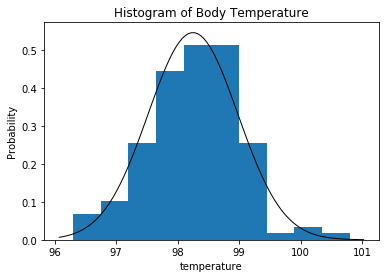

In [41]:
_ = plt.hist(df.temperature, normed=True)
_ = plt.title('Histogram of Body Temperature')
_ = plt.xlabel('temperature')
_ = plt.ylabel('Probability')
mu, std = norm.fit(df.temperature)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)
plt.show()

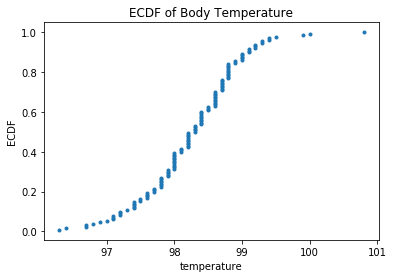

In [42]:
x = np.sort(df.temperature)
y = np.arange(1, len(x)+1)/len(x)
_ = plt.plot(x, y, marker = '.', linestyle ='none')
_ = plt.xlabel('temperature')
_  = plt.ylabel('ECDF')
_ = plt.title('ECDF of Body Temperature')
plt.show()

**Response to Question 1: Yes, based on the histogram and the empirical cumulative distribution function (ECDF) plot, this distribution is normal.**

### Question 2: Is the sample size large? Are the observations independent? 

In [13]:
df.shape

(130, 3)

**Response to Question 2: Because the sample size is 130--which is more than 30 and also far less than 10% of the population size. So, we can assume the observations are independent.**

### Question 3: Is the true population mean really 98.6 degrees F? 

In [62]:
# bootstrap hypothesis test with null hypothesis that there is no difference (i.e., the mean true mean is 98.6)
diff_temp = df.temperature - df.temperature.mean() + 98.6
bs_mean = np.empty(10000)
np.random.seed(10)
for i in range(10000):
    bs_mean[i] = np.random.choice(diff_temp,len(df['temperature'])).mean()

# calculating a p-value
p = np.sum(bs_mean <= df['temperature'].mean())/10000
print(p)

0.0


In [63]:
# because we do not know the standard deviation of the entire population, we can use a t-statistic

t = (df.temperature.mean()-98.6)/(df.temperature.std()/np.sqrt(130))
print(t)

# the P-Value is < .00001

-5.454823292364079


In [57]:
z_score, z_pval = ztest(df.temperature,value=98.6)
print (z_score, z_pval)

-5.4548232923645195 4.9021570141012155e-08


**Response to Question 3: No, the true population mean is not 98.6 degrees.**

### Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests. 

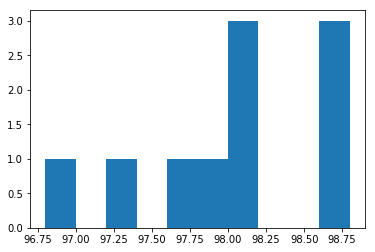

In [58]:
# draw 10 sample from the original sample
np.random.seed(50)
sample10= np.random.choice(df.temperature,size=10)
plt.hist(sample10)
plt.show()

In [69]:
diff_temp = sample10 - sample10.mean() + 98.6
bs_mean = np.empty(10000)
np.random.seed(10)
for i in range(10000):
    bs_mean[i] = np.random.choice(diff_temp,len(sample10)).mean()

# calculating a p-value
p = np.sum(bs_mean <= sample10.mean())/10000
print(p)

0.0008


In [72]:
t = (sample10.mean()-98.6)/(df['temperature'].std()/np.sqrt(130))
print(t)

# the P-Value is < 00001

-9.641639415889596


In [73]:
z_score, z_pval = ztest(sample10,value=98.6)
print (z_score, z_pval)

-3.173119051797501 0.0015081066999842088


**Response to Question 4: t-test is better when sample size is smaller; the distribution is no longer normal and the standard deviation cannot be assumed.**

### Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

In [80]:
# abnormal temperature range using bootstrapping
low = np.empty(1000)
high = np.empty(1000)
for i in range(1000):
    bs_temps = np.random.choice(df.temperature, len(df.temperature))
    low[i] = np.percentile(bs_temps,2.5)
    high[i] = np.percentile(bs_temps,97.5)
# use median of bootstrap low and high value to avoid influence of outliers
temp_low = np.percentile(low,10)
temp_high = np.percentile(high,90)

print(temp_low, temp_high)

96.4675 99.9


In [81]:
# frequentist approach
s = df['temperature'].std()
low = df.temperature.mean() - 1.96*s
high = df.temperature.mean() + 1.96*s

print(low, high)



96.81219177947445 99.68626975898711


**Response to Question 5: Using bootstrapping, we could say abnormal temperatures would be below 96.5 degrees and above 99.9 degrees. Using a frequentist approach, we could say abnormal temperatures would be below 96.8 degrees and above 99.7 degrees.**

### Question 6: Is there a significant difference between males and females in normal temperature?

In [84]:
# funcntion for ecdf

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

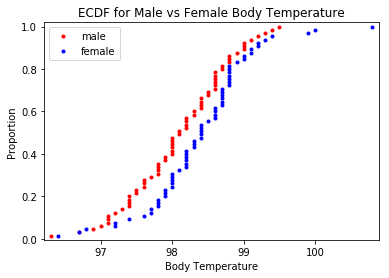

In [87]:
# separating the data
males = df.loc[df['gender'] == 'M']
males_array = np.array(males.temperature)
females = df.loc[df['gender'] == 'F']
females_array = np.array(females.temperature)

#ecdf's for each
male_x, male_y = ecdf(males_array)
female_x, female_y = ecdf(females_array)

#plotting the ecdf's
plt.plot(male_x, male_y, marker = '.', linestyle='none', color='red')
plt.plot(female_x, female_y, marker = '.', linestyle='none', color='blue')
plt.margins(0.02)
plt.xlabel('Body Temperature')
plt.ylabel('Proportion')
plt.title('ECDF for Male vs Female Body Temperature')
plt.legend(('male','female'))

plt.show()

In [97]:
diff = np.mean(females.temperature) - np.mean(males.temperature)
print(diff)

0.289230769230727


In [98]:
# permutations approach
concat = np.concatenate((females_array,males_array))
perm_reps = np.empty(10000)
for i in range(10000):
    perm_resample = np.random.permutation(concat)
    perm_female = perm_reps[:len(females_array)]
    perm_male = perm_reps[len(males_array):]
    t_statistic = np.mean(perm_female) - np.mean(perm_male)
    perm_reps[i] = t_statistic

p_value = np.sum(perm_reps >= diff) / len(perm_reps)
print(p_value)

0.0


/Users/wadesanders/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


**Response to Question 6: Yes, there is a stastically significant difference between the mean temperature of males and females. The average temperature of females is typically almost 0.3 degrees higher than that of males.**